# 1- Importation des librairies pour tester les différents modèles

In [ ]:
pip install lazypredict

In [341]:
import numpy as np
import pandas as pd
import seaborn as sns
#from lazypredict.Supervised import LazyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier, BernoulliRBM
from xgboost import XGBClassifier
from sklearn.svm import NuSVC
from sklearn.svm import SVC
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import timeit, time
from sklearn.model_selection import learning_curve
import os
import warnings
warnings.filterwarnings("ignore")

In [342]:
train = pd.read_csv('train_final.csv')

In [343]:
train.set_index('id', inplace = True)

In [344]:
train

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents,checking_status,employment,savings_status,...,other_payment_plans_bank,other_payment_plans_none,other_payment_plans_stores,housing_for free,housing_own,housing_rent,job_high qualif/self emp/mgmt,job_skilled,job_unemp/unskilled non res,job_unskilled resident
id,,,,,,,,,,,,,,,,,,,,,
30,0.500000,2.456805,-1.0,-0.5,-0.133333,0.0,0.0,1,1,0,...,0,1,0,0,1,0,0,1,0,0
536,1.500000,1.408985,0.0,-0.5,-0.266667,1.0,0.0,1,2,1,...,0,1,0,0,1,0,0,1,0,0
696,-0.916667,0.162747,-0.5,-0.5,0.200000,0.0,0.0,2,2,1,...,0,1,0,0,1,0,0,1,0,0
558,0.000000,-0.591684,0.5,0.5,0.266667,0.0,1.0,2,4,1,...,1,0,0,0,1,0,0,1,0,0
837,0.000000,-0.183257,0.5,-0.5,-0.533333,1.0,0.0,0,2,1,...,0,1,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,1.000000,0.086947,0.5,0.5,-0.600000,0.0,0.0,1,3,1,...,0,1,0,0,0,1,0,1,0,0
271,0.500000,0.101661,0.5,0.5,0.200000,0.0,0.0,1,1,1,...,0,1,0,0,1,0,0,1,0,0
861,-0.416667,-0.184595,0.0,-1.0,-0.266667,1.0,0.0,1,1,1,...,1,0,0,0,1,0,0,0,0,1


# 2- Determination de la target value et split du dataset

In [345]:
y= train['class']
del train['class']
X = train

In [346]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state = 40)

In [347]:
X_train.shape

(610, 47)

In [348]:
y_train.shape

(610,)

In [349]:
X_test.shape

(108, 47)

In [350]:
y_test.shape

(108,)

In [351]:
y_train.value_counts()

1    432
0    178
Name: class, dtype: int64

# 3- Teste des diiférents algorithmes de façon native et visualisation des cas d'overfitting

Train Score Regression Logistique: 0.7557377049180328
Test Score Regression Logistique: 0.7962962962962963


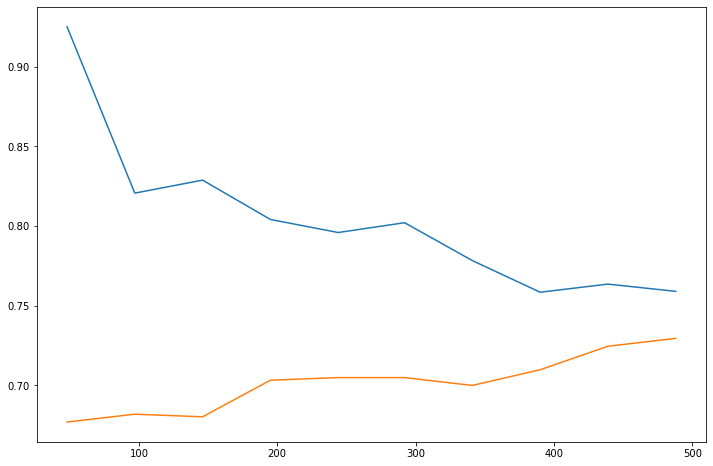

In [352]:
log = LogisticRegression()
log.fit(X_train, y_train)
print('Train Score Regression Logistique:', log.score(X_train, y_train))
print('Test Score Regression Logistique:', log.score(X_test, y_test))

N, train_score, val_score = learning_curve(log, X_train, y_train, scoring = 'accuracy',cv = 5,
                                           train_sizes = np.linspace(0.1, 1, 10))
plt.figure(figsize=(12,8))
plt.plot(N, train_score.mean(axis = 1), label = 'train score')
plt.plot(N, val_score.mean(axis = 1), label = 'validation score')

Train Score KNN: 0.8032786885245902
Test ScoreKNN: 0.7129629629629629


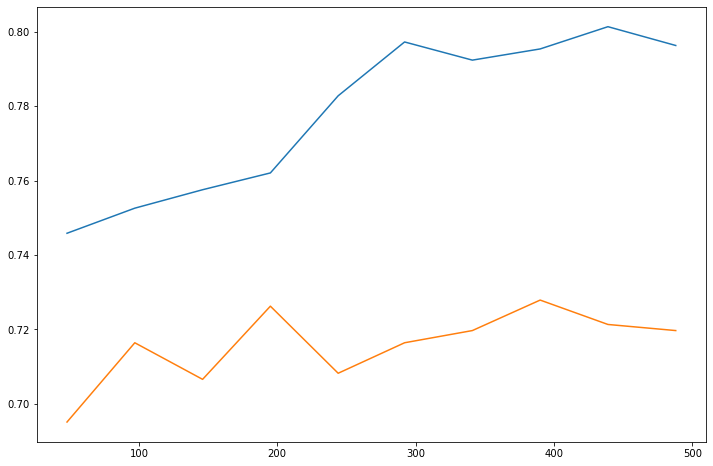

In [353]:
kn = KNeighborsClassifier()
kn.fit(X_train, y_train)
print('Train Score KNN:', kn.score(X_train, y_train))
print('Test ScoreKNN:', kn.score(X_test, y_test))


N, train_score, val_score = learning_curve(kn, X_train, y_train, scoring = 'accuracy',cv = 5,
                                           train_sizes = np.linspace(0.1, 1, 10))
plt.figure(figsize=(12,8))
plt.plot(N, train_score.mean(axis = 1), label = 'train score')
plt.plot(N, val_score.mean(axis = 1), label = 'validation score')

Train Score Naive Bayes: 0.7278688524590164
Test Score Naive Bayes: 0.7870370370370371


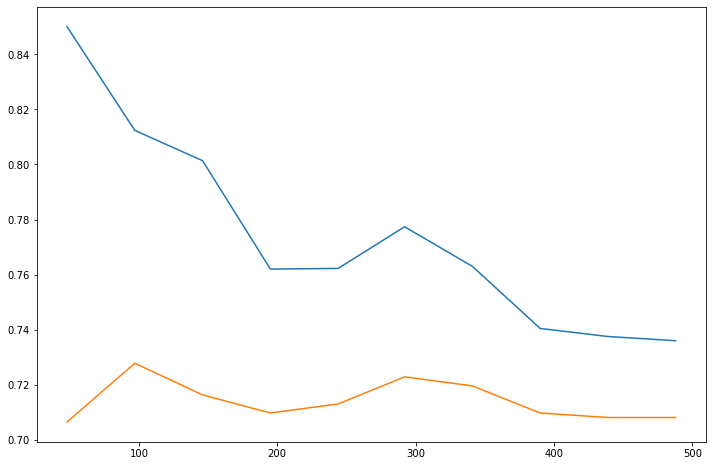

In [247]:
nb = BernoulliNB()
nb.fit(X_train, y_train)
print('Train Score Naive Bayes:', nb.score(X_train, y_train))
print('Test Score Naive Bayes:', nb.score(X_test, y_test))


N, train_score, val_score = learning_curve(nb, X_train, y_train, scoring = 'accuracy',cv = 5,
                                           train_sizes = np.linspace(0.1, 1, 10))
plt.figure(figsize=(12,8))
plt.plot(N, train_score.mean(axis = 1), label = 'train score')
plt.plot(N, val_score.mean(axis = 1), label = 'validation score')

Train Score SVC: 0.7950819672131147
Test Score SVC: 0.7685185185185185


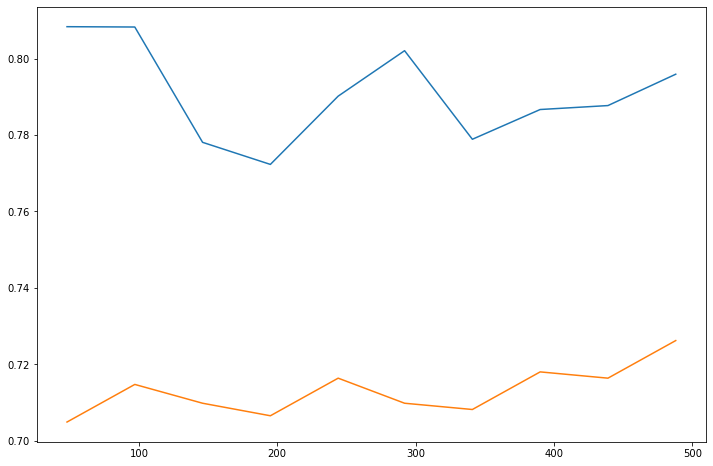

In [248]:
svc = SVC()
svc.fit(X_train, y_train)
print('Train Score SVC:', svc.score(X_train, y_train))
print('Test Score SVC:', svc.score(X_test, y_test))


N, train_score, val_score = learning_curve(svc, X_train, y_train, scoring = 'accuracy',cv = 5,
                                           train_sizes = np.linspace(0.1, 1, 10))
plt.figure(figsize=(12,8))
plt.plot(N, train_score.mean(axis = 1), label = 'train score')
plt.plot(N, val_score.mean(axis = 1), label = 'validation score')

Train Score random forest: 1.0
Test Score random forest: 0.8055555555555556


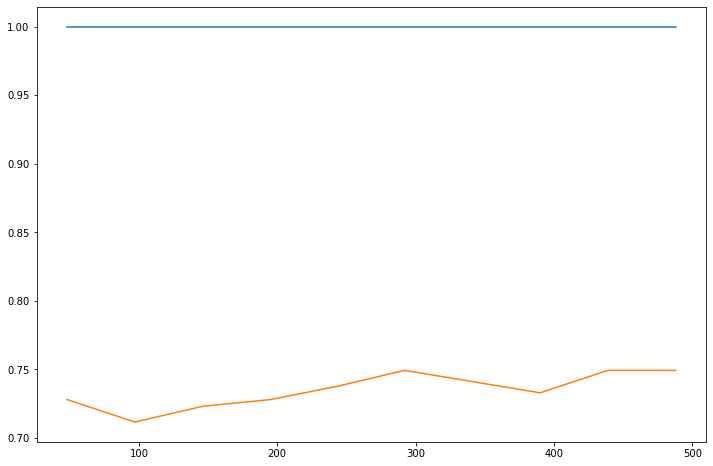

In [249]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
print('Train Score random forest:', rf.score(X_train, y_train))
print('Test Score random forest:', rf.score(X_test, y_test))


N, train_score, val_score = learning_curve(rf, X_train, y_train, scoring = 'accuracy',cv = 5,
                                           train_sizes = np.linspace(0.1, 1, 10))
plt.figure(figsize=(12,8))
plt.plot(N, train_score.mean(axis = 1), label = 'train score')
plt.plot(N, val_score.mean(axis = 1), label = 'validation score')

# 4- Application du GridSearch pour trouver les hyperparamètres optimaux pour les modèles 

In [250]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, auc, f1_score, recall_score,roc_auc_score, roc_curve


In [251]:
# Pour la RL

paramRL = {
    'penalty': ['l1','l2','elasticnet','none'],
    'C' : [0.01, 0.02, 0.03, 1, 1.01, 1.02, 2.01, 2.02,2.03,2.04, 3.01],
    'solver': ['newton-cg','lbfgs','liblinear','sag','saga']
}

gridRL = GridSearchCV(LogisticRegression(), paramRL, cv = 5)
gridRL.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.02, 0.03, 1, 1.01, 1.02, 2.01, 2.02,
                               2.03, 2.04, 3.01],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']})

In [252]:
gridRL.best_score_

0.7327868852459016

In [253]:
gridRL.best_params_

{'C': 2.01, 'penalty': 'l1', 'solver': 'saga'}

In [254]:
start = timeit.default_timer()

modelRL = gridRL.best_estimator_
modelRL.score(X_test, y_test)

stop = timeit.default_timer()
execution_time = stop - start
print("Le temps dexecution est de :" +str(execution_time))
print("train:",modelRL.score(X_train, y_train))
print("test:",modelRL.score(X_test, y_test))

Le temps dexecution est de :0.00268980000009833
train: 0.7573770491803279
test: 0.7962962962962963


In [255]:
RL = LogisticRegression()
RL.fit(X_train, y_train)
y_pred_RL = RL.predict(X_test)
print(accuracy_score(y_pred_RL, y_test))
print(confusion_matrix(y_test, y_pred_RL))
print(classification_report(y_test, y_pred_RL))

0.7962962962962963
[[10 17]
 [ 5 76]]
              precision    recall  f1-score   support

           0       0.67      0.37      0.48        27
           1       0.82      0.94      0.87        81

    accuracy                           0.80       108
   macro avg       0.74      0.65      0.67       108
weighted avg       0.78      0.80      0.77       108



# a- Pour le KNN

In [256]:
paramKNN = {'n_neighbors': np.arange(2, 34),
            'weights': ['uniform','distance'],
            'algorithm': ['ball_tree', 'kd_tree', 'brute', 'auto'],
            'metric': ['euclidean','manhattan', 'minkowski']}
gridKNN = GridSearchCV(KNeighborsClassifier(), paramKNN, cv=5)
gridKNN.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['ball_tree', 'kd_tree', 'brute', 'auto'],
                         'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]),
                         'weights': ['uniform', 'distance']})

In [257]:
gridKNN.best_score_

0.7442622950819673

In [258]:
gridKNN.best_params_

{'algorithm': 'ball_tree',
 'metric': 'manhattan',
 'n_neighbors': 13,
 'weights': 'distance'}

In [259]:
start = timeit.default_timer()

modelKNN = gridKNN.best_estimator_
modelKNN.score(X_test, y_test)

stop = timeit.default_timer()
execution_time = stop - start
print("Le temps dexecution est de :" +str(execution_time))
print("train:",modelKNN.score(X_train, y_train))
print("test:", modelKNN.score(X_test, y_test))


Le temps dexecution est de :0.009769100000085018
train: 1.0
test: 0.75


In [260]:
KNN = KNeighborsClassifier(algorithm= 'ball_tree',
 metric = 'euclidean',
 n_neighbors=  32,
 weights= 'distance')

KNN.fit(X_train, y_train)
y_pred_KNN = KNN.predict(X_test)
print(accuracy_score(y_pred_KNN, y_test))
print(confusion_matrix(y_test, y_pred_KNN))
print(classification_report(y_test, y_pred_KNN))

0.7777777777777778
[[ 9 18]
 [ 6 75]]
              precision    recall  f1-score   support

           0       0.60      0.33      0.43        27
           1       0.81      0.93      0.86        81

    accuracy                           0.78       108
   macro avg       0.70      0.63      0.65       108
weighted avg       0.75      0.78      0.75       108



# b- Pour Naive-Bayes

In [261]:
paramNB = {'alpha' : np.arange(1e-3, 13),
           
           }
gridNB = GridSearchCV(BernoulliNB(), paramNB, cv=5)
gridNB.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=BernoulliNB(),
             param_grid={'alpha': array([1.0000e-03, 1.0010e+00, 2.0010e+00, 3.0010e+00, 4.0010e+00,
       5.0010e+00, 6.0010e+00, 7.0010e+00, 8.0010e+00, 9.0010e+00,
       1.0001e+01, 1.1001e+01, 1.2001e+01])})

In [262]:
gridNB.best_score_

0.7229508196721313

In [263]:
gridNB.best_params_

{'alpha': 12.000999999999998}

In [264]:
start = timeit.default_timer()

modelNB = gridNB.best_estimator_
modelNB.score(X_test, y_test)

stop = timeit.default_timer()
execution_time = stop - start
print("Le temps dexecution est de :" +str(execution_time))
print("train:",modelNB.score(X_train, y_train))
print("test:",modelNB.score(X_test, y_test))


Le temps dexecution est de :0.0031029000001581153
train: 0.7295081967213115
test: 0.7962962962962963


In [265]:
NB = BernoulliNB(alpha = 12.000999999999998)

NB.fit(X_train, y_train)
y_pred_NB = NB.predict(X_test)
print(accuracy_score(y_pred_NB, y_test))
print(confusion_matrix(y_test, y_pred_NB))
print(classification_report(y_test, y_pred_NB))

0.7962962962962963
[[14 13]
 [ 9 72]]
              precision    recall  f1-score   support

           0       0.61      0.52      0.56        27
           1       0.85      0.89      0.87        81

    accuracy                           0.80       108
   macro avg       0.73      0.70      0.71       108
weighted avg       0.79      0.80      0.79       108



## c- Pour SVC

In [266]:
from sklearn.svm import SVC
paramSVC = {'C' : np.arange(15, 23),
           'kernel' : ['linear', 'poly','rbf', 'sigmoid'],
            'gamma' : ['scale', 'auto'],
            'decision_function_shape': ['ovo', 'ovr']
           }
gridSVC = GridSearchCV(SVC(), paramSVC, cv=5)
gridSVC.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': array([15, 16, 17, 18, 19, 20, 21, 22]),
                         'decision_function_shape': ['ovo', 'ovr'],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [267]:
gridSVC.best_score_

0.7524590163934426

In [268]:
gridSVC.best_params_

{'C': 16, 'decision_function_shape': 'ovo', 'gamma': 'auto', 'kernel': 'rbf'}

In [269]:
start = timeit.default_timer()

modelSVC = gridSVC.best_estimator_
modelSVC.score(X_test, y_test)

stop = timeit.default_timer()
execution_time = stop - start
print("Le temps dexecution est de :" +str(execution_time))
print("train:",modelSVC.score(X_train, y_train))
print("test:", modelSVC.score(X_test, y_test))


Le temps dexecution est de :0.005531700000574347
train: 0.898360655737705
test: 0.7870370370370371


In [270]:
SVC = SVC(C= 16, decision_function_shape = "ovo", gamma = "auto", kernel = "rbf")

SVC.fit(X_train, y_train)
y_pred_SVC = SVC.predict(X_test)
print(accuracy_score(y_pred_SVC, y_test))
print(confusion_matrix(y_test, y_pred_SVC))
print(classification_report(y_test, y_pred_SVC))

0.7870370370370371
[[13 14]
 [ 9 72]]
              precision    recall  f1-score   support

           0       0.59      0.48      0.53        27
           1       0.84      0.89      0.86        81

    accuracy                           0.79       108
   macro avg       0.71      0.69      0.70       108
weighted avg       0.78      0.79      0.78       108



## d- Pour la foret aléatoire

In [271]:
from sklearn.ensemble import RandomForestClassifier

paramRF = {'n_estimators' : np.arange(37, 41),
           'criterion' : ['gini', 'entropy'],
            'max_depth' : np.arange(11, 16),  
            'max_features': ['auto', 'sqrt', 'log2']
           }
gridRF = GridSearchCV(RandomForestClassifier(), paramRF, cv=5)
gridRF.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([11, 12, 13, 14, 15]),
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': array([37, 38, 39, 40])})

In [272]:
gridRF.best_score_

0.7557377049180328

In [273]:
gridRF.best_params_

{'criterion': 'gini',
 'max_depth': 11,
 'max_features': 'sqrt',
 'n_estimators': 37}

In [274]:
start = timeit.default_timer()

modelRF = gridRF.best_estimator_
modelRF.score(X_test, y_test)

stop = timeit.default_timer()
execution_time = stop - start
print("Le temps dexecution est de :" +str(execution_time))
print(modelRF.score(X_test, y_test))


Le temps dexecution est de :0.0074177999995299615
0.7777777777777778


In [275]:
RF = RandomForestClassifier(criterion = 'gini',
 max_depth = 12,
 max_features = 'sqrt',
 n_estimators = 37)

RF.fit(X_train, y_train)
y_pred_RF = RF.predict(X_test)
print(accuracy_score(y_pred_RF, y_test))
print(confusion_matrix(y_test, y_pred_RF))
print(classification_report(y_test, y_pred_RF))

0.8611111111111112
[[16 11]
 [ 4 77]]
              precision    recall  f1-score   support

           0       0.80      0.59      0.68        27
           1       0.88      0.95      0.91        81

    accuracy                           0.86       108
   macro avg       0.84      0.77      0.80       108
weighted avg       0.86      0.86      0.85       108



## e- Pour le Bagging Classifier

In [276]:
from sklearn.ensemble import BaggingClassifier

paramBG = {
    'n_estimators' : np.arange(7, 15),
    'max_samples' : np.arange(0.01, 5),
    'max_features' : np.arange(0.01, 5),
    'verbose' : np.arange(1, 5)
}

gridBG = GridSearchCV(BaggingClassifier(), paramBG, cv = 5)
gridBG.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

Building estimator 1 of 7 for this parallel run (total 7)...
Building estimator 2 of 7 for this parallel run (total 7)...
Building estimator 3 of 7 for this parallel run (total 7)...
Building estimator 4 of 7 for this parallel run (total 7)...
Building estimator 5 of 7 for this parallel run (total 7)...
Building estimator 6 of 7 for this parallel run (total 7)...
Building estimator 7 of 7 for this parallel run (total 7)...
Building estimator 1 of 7 for this parallel run (total 7)...
Building estimator 2 of 7 for this parallel run (total 7)...
Building estimator 3 of 7 for this parallel run (total 7)...
Building estimator 4 of 7 for this parallel run (total 7)...
Building estimator 5 of 7 for this parallel run (total 7)...
Building estimator 6 of 7 for this parallel run (total 7)...
Building estimator 7 of 7 for this parallel run (total 7)...
Building estimator 1 of 7 for this parallel run (total 7)...
Building estimator 2 of 7 for this parallel run (total 7)...
Building estimator 3 of 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent work


Building estimator 6 of 7 for this parallel run (total 7)...
Building estimator 7 of 7 for this parallel run (total 7)...
Building estimator 1 of 7 for this parallel run (total 7)...
Building estimator 2 of 7 for this parallel run (total 7)...
Building estimator 3 of 7 for this parallel run (total 7)...
Building estimator 4 of 7 for this parallel run (total 7)...
Building estimator 5 of 7 for this parallel run (total 7)...
Building estimator 6 of 7 for this parallel run (total 7)...
Building estimator 7 of 7 for this parallel run (total 7)...
Building estimator 1 of 7 for this parallel run (total 7)...
Building estimator 2 of 7 for this parallel run (total 7)...
Building estimator 3 of 7 for this parallel run (total 7)...
Building estimator 4 of 7 for this parallel run (total 7)...
Building estimator 5 of 7 for this parallel run (total 7)...
Building estimator 6 of 7 for this parallel run (total 7)...
Building estimator 7 of 7 for this parallel run (total 7)...
Building estimator 1 of

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Us

Building estimator 1 of 8 for this parallel run (total 8)...
Building estimator 2 of 8 for this parallel run (total 8)...
Building estimator 3 of 8 for this parallel run (total 8)...
Building estimator 4 of 8 for this parallel run (total 8)...
Building estimator 5 of 8 for this parallel run (total 8)...
Building estimator 6 of 8 for this parallel run (total 8)...
Building estimator 7 of 8 for this parallel run (total 8)...
Building estimator 8 of 8 for this parallel run (total 8)...
Building estimator 1 of 8 for this parallel run (total 8)...
Building estimator 2 of 8 for this parallel run (total 8)...
Building estimator 3 of 8 for this parallel run (total 8)...
Building estimator 4 of 8 for this parallel run (total 8)...
Building estimator 5 of 8 for this parallel run (total 8)...
Building estimator 6 of 8 for this parallel run (total 8)...
Building estimator 7 of 8 for this parallel run (total 8)...
Building estimator 8 of 8 for this parallel run (total 8)...
Building estimator 1 of 

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0

Building estimator 2 of 8 for this parallel run (total 8)...
Building estimator 3 of 8 for this parallel run (total 8)...
Building estimator 4 of 8 for this parallel run (total 8)...
Building estimator 5 of 8 for this parallel run (total 8)...
Building estimator 6 of 8 for this parallel run (total 8)...
Building estimator 7 of 8 for this parallel run (total 8)...
Building estimator 8 of 8 for this parallel run (total 8)...
Building estimator 1 of 8 for this parallel run (total 8)...
Building estimator 2 of 8 for this parallel run (total 8)...
Building estimator 3 of 8 for this parallel run (total 8)...
Building estimator 4 of 8 for this parallel run (total 8)...
Building estimator 5 of 8 for this parallel run (total 8)...
Building estimator 6 of 8 for this parallel run (total 8)...
Building estimator 7 of 8 for this parallel run (total 8)...
Building estimator 8 of 8 for this parallel run (total 8)...
Building estimator 1 of 8 for this parallel run (total 8)...
Building estimator 2 of 

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0

Building estimator 1 of 9 for this parallel run (total 9)...
Building estimator 2 of 9 for this parallel run (total 9)...
Building estimator 3 of 9 for this parallel run (total 9)...
Building estimator 4 of 9 for this parallel run (total 9)...
Building estimator 5 of 9 for this parallel run (total 9)...
Building estimator 6 of 9 for this parallel run (total 9)...
Building estimator 7 of 9 for this parallel run (total 9)...
Building estimator 8 of 9 for this parallel run (total 9)...
Building estimator 9 of 9 for this parallel run (total 9)...
Building estimator 1 of 9 for this parallel run (total 9)...
Building estimator 2 of 9 for this parallel run (total 9)...
Building estimator 3 of 9 for this parallel run (total 9)...
Building estimator 4 of 9 for this parallel run (total 9)...
Building estimator 5 of 9 for this parallel run (total 9)...
Building estimator 6 of 9 for this parallel run (total 9)...
Building estimator 7 of 9 for this parallel run (total 9)...
Building estimator 8 of 

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0

Building estimator 1 of 9 for this parallel run (total 9)...
Building estimator 2 of 9 for this parallel run (total 9)...
Building estimator 3 of 9 for this parallel run (total 9)...
Building estimator 4 of 9 for this parallel run (total 9)...
Building estimator 5 of 9 for this parallel run (total 9)...
Building estimator 6 of 9 for this parallel run (total 9)...
Building estimator 7 of 9 for this parallel run (total 9)...
Building estimator 8 of 9 for this parallel run (total 9)...
Building estimator 9 of 9 for this parallel run (total 9)...
Building estimator 1 of 9 for this parallel run (total 9)...
Building estimator 2 of 9 for this parallel run (total 9)...
Building estimator 3 of 9 for this parallel run (total 9)...
Building estimator 4 of 9 for this parallel run (total 9)...
Building estimator 5 of 9 for this parallel run (total 9)...
Building estimator 6 of 9 for this parallel run (total 9)...
Building estimator 7 of 9 for this parallel run (total 9)...
Building estimator 8 of 

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0

Building estimator 1 of 9 for this parallel run (total 9)...
Building estimator 2 of 9 for this parallel run (total 9)...
Building estimator 3 of 9 for this parallel run (total 9)...
Building estimator 4 of 9 for this parallel run (total 9)...
Building estimator 5 of 9 for this parallel run (total 9)...
Building estimator 6 of 9 for this parallel run (total 9)...
Building estimator 7 of 9 for this parallel run (total 9)...
Building estimator 8 of 9 for this parallel run (total 9)...
Building estimator 9 of 9 for this parallel run (total 9)...
Building estimator 1 of 9 for this parallel run (total 9)...
Building estimator 2 of 9 for this parallel run (total 9)...
Building estimator 3 of 9 for this parallel run (total 9)...
Building estimator 4 of 9 for this parallel run (total 9)...
Building estimator 5 of 9 for this parallel run (total 9)...
Building estimator 6 of 9 for this parallel run (total 9)...
Building estimator 7 of 9 for this parallel run (total 9)...
Building estimator 8 of 

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jo

Building estimator 1 of 10 for this parallel run (total 10)...
Building estimator 2 of 10 for this parallel run (total 10)...
Building estimator 3 of 10 for this parallel run (total 10)...
Building estimator 4 of 10 for this parallel run (total 10)...
Building estimator 5 of 10 for this parallel run (total 10)...
Building estimator 6 of 10 for this parallel run (total 10)...
Building estimator 7 of 10 for this parallel run (total 10)...
Building estimator 8 of 10 for this parallel run (total 10)...
Building estimator 9 of 10 for this parallel run (total 10)...
Building estimator 10 of 10 for this parallel run (total 10)...
Building estimator 1 of 10 for this parallel run (total 10)...
Building estimator 2 of 10 for this parallel run (total 10)...
Building estimator 3 of 10 for this parallel run (total 10)...
Building estimator 4 of 10 for this parallel run (total 10)...
Building estimator 5 of 10 for this parallel run (total 10)...
Building estimator 6 of 10 for this parallel run (tota

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0

Building estimator 1 of 10 for this parallel run (total 10)...
Building estimator 2 of 10 for this parallel run (total 10)...
Building estimator 3 of 10 for this parallel run (total 10)...
Building estimator 4 of 10 for this parallel run (total 10)...
Building estimator 5 of 10 for this parallel run (total 10)...
Building estimator 6 of 10 for this parallel run (total 10)...
Building estimator 7 of 10 for this parallel run (total 10)...
Building estimator 8 of 10 for this parallel run (total 10)...
Building estimator 9 of 10 for this parallel run (total 10)...
Building estimator 10 of 10 for this parallel run (total 10)...
Building estimator 1 of 10 for this parallel run (total 10)...
Building estimator 2 of 10 for this parallel run (total 10)...
Building estimator 3 of 10 for this parallel run (total 10)...
Building estimator 4 of 10 for this parallel run (total 10)...
Building estimator 5 of 10 for this parallel run (total 10)...
Building estimator 6 of 10 for this parallel run (tota

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent work

Building estimator 8 of 10 for this parallel run (total 10)...
Building estimator 9 of 10 for this parallel run (total 10)...
Building estimator 10 of 10 for this parallel run (total 10)...
Building estimator 1 of 10 for this parallel run (total 10)...
Building estimator 2 of 10 for this parallel run (total 10)...
Building estimator 3 of 10 for this parallel run (total 10)...
Building estimator 4 of 10 for this parallel run (total 10)...
Building estimator 5 of 10 for this parallel run (total 10)...
Building estimator 6 of 10 for this parallel run (total 10)...
Building estimator 7 of 10 for this parallel run (total 10)...
Building estimator 8 of 10 for this parallel run (total 10)...
Building estimator 9 of 10 for this parallel run (total 10)...
Building estimator 10 of 10 for this parallel run (total 10)...
Building estimator 1 of 10 for this parallel run (total 10)...
Building estimator 2 of 10 for this parallel run (total 10)...
Building estimator 3 of 10 for this parallel run (tot

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Paral

Building estimator 1 of 11 for this parallel run (total 11)...
Building estimator 2 of 11 for this parallel run (total 11)...
Building estimator 3 of 11 for this parallel run (total 11)...
Building estimator 4 of 11 for this parallel run (total 11)...
Building estimator 5 of 11 for this parallel run (total 11)...
Building estimator 6 of 11 for this parallel run (total 11)...
Building estimator 7 of 11 for this parallel run (total 11)...
Building estimator 8 of 11 for this parallel run (total 11)...
Building estimator 9 of 11 for this parallel run (total 11)...
Building estimator 10 of 11 for this parallel run (total 11)...
Building estimator 11 of 11 for this parallel run (total 11)...
Building estimator 1 of 11 for this parallel run (total 11)...
Building estimator 2 of 11 for this parallel run (total 11)...
Building estimator 3 of 11 for this parallel run (total 11)...
Building estimator 4 of 11 for this parallel run (total 11)...
Building estimator 5 of 11 for this parallel run (tot

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0

Building estimator 6 of 11 for this parallel run (total 11)...
Building estimator 7 of 11 for this parallel run (total 11)...
Building estimator 8 of 11 for this parallel run (total 11)...
Building estimator 9 of 11 for this parallel run (total 11)...
Building estimator 10 of 11 for this parallel run (total 11)...
Building estimator 11 of 11 for this parallel run (total 11)...
Building estimator 1 of 11 for this parallel run (total 11)...
Building estimator 2 of 11 for this parallel run (total 11)...
Building estimator 3 of 11 for this parallel run (total 11)...
Building estimator 4 of 11 for this parallel run (total 11)...
Building estimator 5 of 11 for this parallel run (total 11)...
Building estimator 6 of 11 for this parallel run (total 11)...
Building estimator 7 of 11 for this parallel run (total 11)...
Building estimator 8 of 11 for this parallel run (total 11)...
Building estimator 9 of 11 for this parallel run (total 11)...
Building estimator 10 of 11 for this parallel run (to

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0


Building estimator 1 of 11 for this parallel run (total 11)...
Building estimator 2 of 11 for this parallel run (total 11)...
Building estimator 3 of 11 for this parallel run (total 11)...
Building estimator 4 of 11 for this parallel run (total 11)...
Building estimator 5 of 11 for this parallel run (total 11)...
Building estimator 6 of 11 for this parallel run (total 11)...
Building estimator 7 of 11 for this parallel run (total 11)...
Building estimator 8 of 11 for this parallel run (total 11)...
Building estimator 9 of 11 for this parallel run (total 11)...
Building estimator 10 of 11 for this parallel run (total 11)...
Building estimator 11 of 11 for this parallel run (total 11)...
Building estimator 1 of 11 for this parallel run (total 11)...
Building estimator 2 of 11 for this parallel run (total 11)...
Building estimator 3 of 11 for this parallel run (total 11)...
Building estimator 4 of 11 for this parallel run (total 11)...
Building estimator 5 of 11 for this parallel run (to

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_job

Building estimator 3 of 12 for this parallel run (total 12)...
Building estimator 4 of 12 for this parallel run (total 12)...
Building estimator 5 of 12 for this parallel run (total 12)...
Building estimator 6 of 12 for this parallel run (total 12)...
Building estimator 7 of 12 for this parallel run (total 12)...
Building estimator 8 of 12 for this parallel run (total 12)...
Building estimator 9 of 12 for this parallel run (total 12)...
Building estimator 10 of 12 for this parallel run (total 12)...
Building estimator 11 of 12 for this parallel run (total 12)...
Building estimator 12 of 12 for this parallel run (total 12)...
Building estimator 1 of 12 for this parallel run (total 12)...
Building estimator 2 of 12 for this parallel run (total 12)...
Building estimator 3 of 12 for this parallel run (total 12)...
Building estimator 4 of 12 for this parallel run (total 12)...
Building estimator 5 of 12 for this parallel run (total 12)...
Building estimator 6 of 12 for this parallel run (to

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0


Building estimator 9 of 12 for this parallel run (total 12)...
Building estimator 10 of 12 for this parallel run (total 12)...
Building estimator 11 of 12 for this parallel run (total 12)...
Building estimator 12 of 12 for this parallel run (total 12)...
Building estimator 1 of 12 for this parallel run (total 12)...
Building estimator 2 of 12 for this parallel run (total 12)...
Building estimator 3 of 12 for this parallel run (total 12)...
Building estimator 4 of 12 for this parallel run (total 12)...
Building estimator 5 of 12 for this parallel run (total 12)...
Building estimator 6 of 12 for this parallel run (total 12)...
Building estimator 7 of 12 for this parallel run (total 12)...
Building estimator 8 of 12 for this parallel run (total 12)...
Building estimator 9 of 12 for this parallel run (total 12)...
Building estimator 10 of 12 for this parallel run (total 12)...
Building estimator 11 of 12 for this parallel run (total 12)...
Building estimator 12 of 12 for this parallel run

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0

Building estimator 4 of 12 for this parallel run (total 12)...
Building estimator 5 of 12 for this parallel run (total 12)...
Building estimator 6 of 12 for this parallel run (total 12)...
Building estimator 7 of 12 for this parallel run (total 12)...
Building estimator 8 of 12 for this parallel run (total 12)...
Building estimator 9 of 12 for this parallel run (total 12)...
Building estimator 10 of 12 for this parallel run (total 12)...
Building estimator 11 of 12 for this parallel run (total 12)...
Building estimator 12 of 12 for this parallel run (total 12)...
Building estimator 1 of 12 for this parallel run (total 12)...
Building estimator 2 of 12 for this parallel run (total 12)...
Building estimator 3 of 12 for this parallel run (total 12)...
Building estimator 4 of 12 for this parallel run (total 12)...
Building estimator 5 of 12 for this parallel run (total 12)...
Building estimator 6 of 12 for this parallel run (total 12)...
Building estimator 7 of 12 for this parallel run (to

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_job

Building estimator 1 of 13 for this parallel run (total 13)...
Building estimator 2 of 13 for this parallel run (total 13)...
Building estimator 3 of 13 for this parallel run (total 13)...
Building estimator 4 of 13 for this parallel run (total 13)...
Building estimator 5 of 13 for this parallel run (total 13)...
Building estimator 6 of 13 for this parallel run (total 13)...
Building estimator 7 of 13 for this parallel run (total 13)...
Building estimator 8 of 13 for this parallel run (total 13)...
Building estimator 9 of 13 for this parallel run (total 13)...
Building estimator 10 of 13 for this parallel run (total 13)...
Building estimator 11 of 13 for this parallel run (total 13)...
Building estimator 12 of 13 for this parallel run (total 13)...
Building estimator 13 of 13 for this parallel run (total 13)...
Building estimator 1 of 13 for this parallel run (total 13)...
Building estimator 2 of 13 for this parallel run (total 13)...
Building estimator 3 of 13 for this parallel run (t

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0


Building estimator 3 of 13 for this parallel run (total 13)...
Building estimator 4 of 13 for this parallel run (total 13)...
Building estimator 5 of 13 for this parallel run (total 13)...
Building estimator 6 of 13 for this parallel run (total 13)...
Building estimator 7 of 13 for this parallel run (total 13)...
Building estimator 8 of 13 for this parallel run (total 13)...
Building estimator 9 of 13 for this parallel run (total 13)...
Building estimator 10 of 13 for this parallel run (total 13)...
Building estimator 11 of 13 for this parallel run (total 13)...
Building estimator 12 of 13 for this parallel run (total 13)...
Building estimator 13 of 13 for this parallel run (total 13)...
Building estimator 1 of 13 for this parallel run (total 13)...
Building estimator 2 of 13 for this parallel run (total 13)...
Building estimator 3 of 13 for this parallel run (total 13)...
Building estimator 4 of 13 for this parallel run (total 13)...
Building estimator 5 of 13 for this parallel run (

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent work

Building estimator 10 of 13 for this parallel run (total 13)...
Building estimator 11 of 13 for this parallel run (total 13)...
Building estimator 12 of 13 for this parallel run (total 13)...
Building estimator 13 of 13 for this parallel run (total 13)...
Building estimator 1 of 13 for this parallel run (total 13)...
Building estimator 2 of 13 for this parallel run (total 13)...
Building estimator 3 of 13 for this parallel run (total 13)...
Building estimator 4 of 13 for this parallel run (total 13)...
Building estimator 5 of 13 for this parallel run (total 13)...
Building estimator 6 of 13 for this parallel run (total 13)...
Building estimator 7 of 13 for this parallel run (total 13)...
Building estimator 8 of 13 for this parallel run (total 13)...
Building estimator 9 of 13 for this parallel run (total 13)...
Building estimator 10 of 13 for this parallel run (total 13)...
Building estimator 11 of 13 for this parallel run (total 13)...
Building estimator 12 of 13 for this parallel run

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0

Building estimator 1 of 14 for this parallel run (total 14)...
Building estimator 2 of 14 for this parallel run (total 14)...
Building estimator 3 of 14 for this parallel run (total 14)...
Building estimator 4 of 14 for this parallel run (total 14)...
Building estimator 5 of 14 for this parallel run (total 14)...
Building estimator 6 of 14 for this parallel run (total 14)...
Building estimator 7 of 14 for this parallel run (total 14)...
Building estimator 8 of 14 for this parallel run (total 14)...
Building estimator 9 of 14 for this parallel run (total 14)...
Building estimator 10 of 14 for this parallel run (total 14)...
Building estimator 11 of 14 for this parallel run (total 14)...
Building estimator 12 of 14 for this parallel run (total 14)...
Building estimator 13 of 14 for this parallel run (total 14)...
Building estimator 14 of 14 for this parallel run (total 14)...
Building estimator 1 of 14 for this parallel run (total 14)...
Building estimator 2 of 14 for this parallel run (

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0

Building estimator 9 of 14 for this parallel run (total 14)...
Building estimator 10 of 14 for this parallel run (total 14)...
Building estimator 11 of 14 for this parallel run (total 14)...
Building estimator 12 of 14 for this parallel run (total 14)...
Building estimator 13 of 14 for this parallel run (total 14)...
Building estimator 14 of 14 for this parallel run (total 14)...
Building estimator 1 of 14 for this parallel run (total 14)...
Building estimator 2 of 14 for this parallel run (total 14)...
Building estimator 3 of 14 for this parallel run (total 14)...
Building estimator 4 of 14 for this parallel run (total 14)...
Building estimator 5 of 14 for this parallel run (total 14)...
Building estimator 6 of 14 for this parallel run (total 14)...
Building estimator 7 of 14 for this parallel run (total 14)...
Building estimator 8 of 14 for this parallel run (total 14)...
Building estimator 9 of 14 for this parallel run (total 14)...
Building estimator 10 of 14 for this parallel run 

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0


Building estimator 9 of 14 for this parallel run (total 14)...
Building estimator 10 of 14 for this parallel run (total 14)...
Building estimator 11 of 14 for this parallel run (total 14)...
Building estimator 12 of 14 for this parallel run (total 14)...
Building estimator 13 of 14 for this parallel run (total 14)...
Building estimator 14 of 14 for this parallel run (total 14)...
Building estimator 1 of 14 for this parallel run (total 14)...
Building estimator 2 of 14 for this parallel run (total 14)...
Building estimator 3 of 14 for this parallel run (total 14)...
Building estimator 4 of 14 for this parallel run (total 14)...
Building estimator 5 of 14 for this parallel run (total 14)...
Building estimator 6 of 14 for this parallel run (total 14)...
Building estimator 7 of 14 for this parallel run (total 14)...
Building estimator 8 of 14 for this parallel run (total 14)...
Building estimator 9 of 14 for this parallel run (total 14)...
Building estimator 10 of 14 for this parallel run

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Building estimator 1 of 12 for this parallel run (total 12)...
Building estimator 2 of 12 for this parallel run (total 12)...
Building estimator 3 of 12 for this parallel run (total 12)...
Building estimator 4 of 12 for this parallel run (total 12)...
Building estimator 5 of 12 for this parallel run (total 12)...
Building estimator 6 of 12 for this parallel run (total 12)...
Building estimator 7 of 12 for this parallel run (total 12)...
Building estimator 8 of 12 for this parallel run (total 12)...
Building estimator 9 of 12 for this parallel run (total 12)...
Building estimator 10 of 12 for this parallel run (total 12)...
Building estimator 11 of 12 for this parallel run (total 12)...
Building estimator 12 of 12 for this parallel run (total 12)...


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


GridSearchCV(cv=5, estimator=BaggingClassifier(),
             param_grid={'max_features': array([0.01, 1.01, 2.01, 3.01, 4.01]),
                         'max_samples': array([0.01, 1.01, 2.01, 3.01, 4.01]),
                         'n_estimators': array([ 7,  8,  9, 10, 11, 12, 13, 14]),
                         'verbose': array([1, 2, 3, 4])})

In [277]:
gridBG.best_score_

0.7180327868852459

In [278]:
gridBG.best_params_

{'max_features': 0.01, 'max_samples': 0.01, 'n_estimators': 12, 'verbose': 4}

In [280]:
start = timeit.default_timer()

modelBG = gridBG.best_estimator_
modelBG.score(X_test, y_test)

stop = timeit.default_timer()
execution_time = stop - start
print("Le temps dexecution est de :" +str(execution_time))
print("train:",modelBG.score(X_train, y_train))
print("test:", modelBG.score(X_test, y_test))



Le temps dexecution est de :0.006210999999893829
train: 0.7081967213114754
test: 0.75


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


In [281]:
BG = BaggingClassifier(base_estimator =KNeighborsClassifier(algorithm= 'ball_tree',
 metric = 'euclidean',
 n_neighbors=  32,
 weights= 'distance'),
n_estimators = 13)
BG.fit(X_train, y_train)
y_pred_BG = BG.predict(X_test)
print(accuracy_score(y_pred_BG, y_test))
print(confusion_matrix(y_test, y_pred_BG))
print(classification_report(y_test, y_pred_BG))

0.7592592592592593
[[ 7 20]
 [ 6 75]]
              precision    recall  f1-score   support

           0       0.54      0.26      0.35        27
           1       0.79      0.93      0.85        81

    accuracy                           0.76       108
   macro avg       0.66      0.59      0.60       108
weighted avg       0.73      0.76      0.73       108



# f- Pour NuSVC

In [282]:
from sklearn.svm import NuSVC
paramNuSVC = {
           'kernel' : ['linear', 'poly','rbf', 'sigmoid'],
            'gamma' : ['scale', 'auto'],
            'decision_function_shape': ['ovo', 'ovr']
           }
gridNuSVC = GridSearchCV(NuSVC(), paramNuSVC, cv=5)
gridNuSVC.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=NuSVC(),
             param_grid={'decision_function_shape': ['ovo', 'ovr'],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [283]:
gridNuSVC.best_score_

0.7508196721311475

In [284]:
gridNuSVC.best_params_

{'decision_function_shape': 'ovo', 'gamma': 'scale', 'kernel': 'rbf'}

In [285]:
start = timeit.default_timer()

modelNuSVC = gridNuSVC.best_estimator_
modelNuSVC.score(X_test, y_test)

stop = timeit.default_timer()
execution_time = stop - start
print("Le temps dexecution est de :" +str(execution_time))
print("train:",modelNuSVC.score(X_train, y_train))
print("test:", modelNuSVC.score(X_test, y_test))


Le temps dexecution est de :0.005750399999669753
train: 0.8950819672131147
test: 0.7962962962962963


In [286]:
NuSVC = NuSVC(decision_function_shape ='ovo', gamma= 'scale', kernel= 'rbf')

NuSVC.fit(X_train, y_train)
y_pred_NuSVC = NuSVC.predict(X_test)
print(accuracy_score(y_pred_NuSVC, y_test))
print(confusion_matrix(y_test, y_pred_NuSVC))
print(classification_report(y_test, y_pred_NuSVC))

0.7962962962962963
[[14 13]
 [ 9 72]]
              precision    recall  f1-score   support

           0       0.61      0.52      0.56        27
           1       0.85      0.89      0.87        81

    accuracy                           0.80       108
   macro avg       0.73      0.70      0.71       108
weighted avg       0.79      0.80      0.79       108



# g- Pour XGBClassifier

In [287]:
from xgboost import XGBClassifier

paramXGB = { 
    'booster': ['gbtree','gblinear'],
    'eta' : [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.2],
}
gridXGB = GridSearchCV(XGBClassifier(), paramXGB, cv=5)
gridXGB.fit(X_train, y_train)

[10:25:51] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:25:51] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:25:51] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:25:51] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

[10:25:57] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:25:57] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:25:57] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:25:57] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

[10:26:01] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:26:01] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:26:01] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:26:01] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

[10:26:02] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:26:02] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:26:03] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:26:03] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None,

In [288]:
gridXGB.best_score_

0.7573770491803278

In [289]:
gridXGB.best_params_

{'booster': 'gbtree', 'eta': 0.04}

In [290]:
start = timeit.default_timer()

modelXGB = gridXGB.best_estimator_
modelXGB.score(X_test, y_test)

stop = timeit.default_timer()
execution_time = stop - start
print("Le temps dexecution est de :" +str(execution_time))
print("train:",modelXGB.score(X_train, y_train))
print("test:", modelXGB.score(X_test, y_test))


Le temps dexecution est de :0.005039100000431063
train: 0.9459016393442623
test: 0.7962962962962963


In [356]:
XGB = XGBClassifier(booster = "gbtree", eta= 0.04)

XGB.fit(X_train, y_train)
y_pred_XGB = XGB.predict(X_test)
print(accuracy_score(y_pred_XGB, y_test))
print(confusion_matrix(y_test, y_pred_XGB))
print(classification_report(y_test, y_pred_XGB))

0.7962962962962963
[[12 15]
 [ 7 74]]
              precision    recall  f1-score   support

           0       0.63      0.44      0.52        27
           1       0.83      0.91      0.87        81

    accuracy                           0.80       108
   macro avg       0.73      0.68      0.70       108
weighted avg       0.78      0.80      0.78       108



## h- Pour AdaBoostClassifier

In [292]:
from sklearn.ensemble import AdaBoostClassifier

paramAda = { 
    'n_estimators': np.arange(85, 102),
    'algorithm' : ['SAMME', 'SAMME.R'],
    'random_state': np.arange(1, 10)
}
gridAda = GridSearchCV(AdaBoostClassifier(), paramAda, cv=5, scoring="accuracy")
gridAda.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(),
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'n_estimators': array([ 85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,
        98,  99, 100, 101]),
                         'random_state': array([1, 2, 3, 4, 5, 6, 7, 8, 9])},
             scoring='accuracy')

In [293]:
gridAda.best_score_

0.7524590163934426

In [294]:
gridAda.best_params_

{'algorithm': 'SAMME.R', 'n_estimators': 86, 'random_state': 1}

In [298]:
start = timeit.default_timer()

modelAda = gridAda.best_estimator_
modelAda.score(X_test, y_test)

stop = timeit.default_timer()
execution_time = stop - start
print("Le temps dexecution est de :" +str(execution_time))
print("train:",modelAda.score(X_train, y_train))
print("test:", modelAda.score(X_test, y_test))


Le temps dexecution est de :0.016237599999840313
train: 0.840983606557377
test: 0.8333333333333334


In [299]:
Ada = AdaBoostClassifier()

Ada.fit(X_train, y_train)
y_pred_Ada = Ada.predict(X_test)
print(accuracy_score(y_pred_Ada, y_test))
print(confusion_matrix(y_test, y_pred_Ada))
print(classification_report(y_test, y_pred_Ada))

0.8333333333333334
[[15 12]
 [ 6 75]]
              precision    recall  f1-score   support

           0       0.71      0.56      0.63        27
           1       0.86      0.93      0.89        81

    accuracy                           0.83       108
   macro avg       0.79      0.74      0.76       108
weighted avg       0.83      0.83      0.83       108



# 5- Comparatif des différents modèles et choix du meilleur modèle

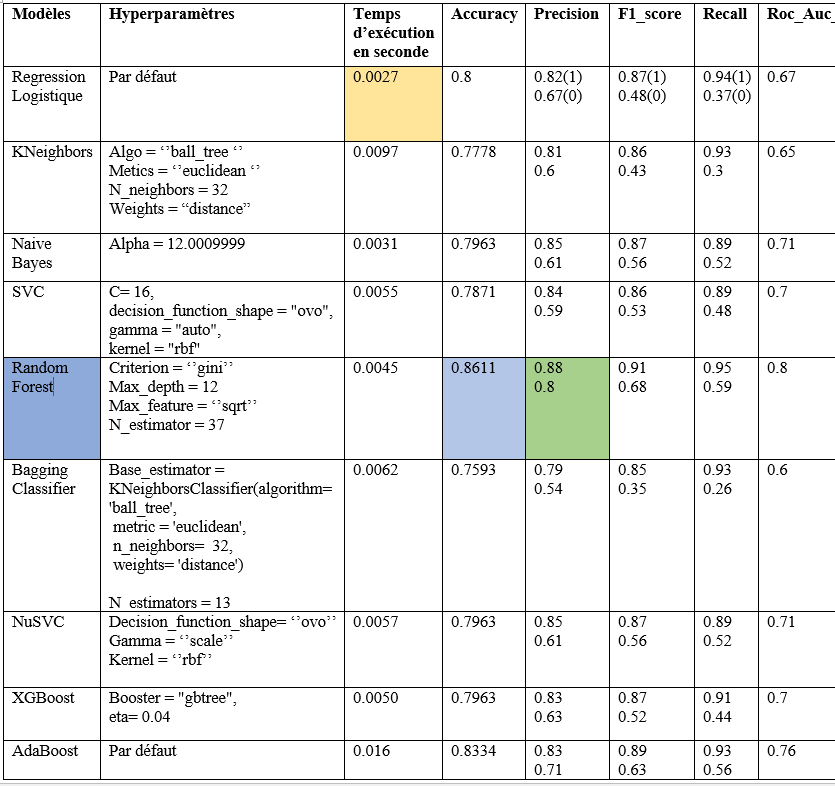

Après la visualisation de ce tableau comparatif, nous pouvons dire que le meilleur modèle est le le RandomForestClassifier car il a un meilleur accuracy score qui est de 0.86 avec un temps d'exécution qui est de 0.0045 secondes

Le modèle le plus rapide est LogisticRegression avec une vitesse d'execution de 0.0027 seconde

# 6- Utilisation des méthodes d'ensemble

# a- Voting Classifier

In [300]:
from sklearn.ensemble import VotingClassifier

In [310]:
model_1 = KNeighborsClassifier(algorithm= 'ball_tree',
 metric = 'euclidean',
 n_neighbors=  32,
 weights= 'distance')

model_2 =  RandomForestClassifier()

model_3 = SVC(C = 15, decision_function_shape = "ovo", gamma = "auto", kernel = "rbf")
model_4 = VotingClassifier([('KNN', model_1),
                            ('RandomForest', model_2),
                            ('SVC', model_3)],
                          voting = 'hard')

for model in (model_1, model_2, model_3, model_4):
    model.fit(X_train, y_train)
    print(model.__class__.__name__, model.score(X_test, y_test))

KNeighborsClassifier 0.7777777777777778
RandomForestClassifier 0.8425925925925926
SVC 0.7870370370370371
VotingClassifier 0.8055555555555556


# b- Bagging

In [319]:
model = BaggingClassifier(base_estimator =KNeighborsClassifier(algorithm= 'ball_tree',
 metric = 'euclidean',
 n_neighbors=  32,
 weights= 'distance'),
n_estimators = 13)

model.fit(X_train, y_train)
model.score(X_test, y_test)

0.7685185185185185

# c- Stacking

In [320]:
from sklearn.ensemble import StackingClassifier

In [334]:
model_4 = StackingClassifier([('KNN', model_1),
                            ('RandomForest', model_2),
                            ('SVC', model_3)],
                          final_estimator = RandomForestClassifier(criterion = 'gini',
 max_depth = 12,
 max_features = 'sqrt',
 n_estimators = 37))

model.fit(X_train, y_train)
model.score(X_test, y_test)

0.7870370370370371

In [335]:
from tpot import TPOTClassifier

In [336]:
tpot = TPOTClassifier(generations = 15, verbosity = 2, population_size = 611, n_jobs = -1)
tpot.fit(X_train, y_train)


Generation 1 - Current best internal CV score: 0.760655737704918


TPOT closed during evaluation in one generation.


TPOT closed prematurely. Will use the current best pipeline.

Best pipeline: RandomForestClassifier(input_matrix, bootstrap=True, criterion=entropy, max_features=0.6500000000000001, min_samples_leaf=5, min_samples_split=18, n_estimators=100)


TPOTClassifier(generations=15, n_jobs=-1, population_size=611, verbosity=2)

In [337]:
tpot.fitted_pipeline_

Pipeline(steps=[('randomforestclassifier',
                 RandomForestClassifier(criterion='entropy',
                                        max_features=0.6500000000000001,
                                        min_samples_leaf=5,
                                        min_samples_split=18))])

In [338]:
tpot.score(X_test, y_test)

0.8148148148148148